<a href="https://colab.research.google.com/github/rutapsz/timo/blob/main/timo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Шаг 1: Загрузка данных. Загружен датасет, содержащий числовые
признаки California Housing. Импортированы необходимые библиотеки для
работы с данными, визуализацией и анализом. Загружены данные в DataFrame
и просмотрены первые строки.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

california = fetch_california_housing()

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['TARGET'] = california.target

print(california_df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  TARGET  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


Шаг 2: Исследование корреляций. Построена корреляционная матрица
для числовых признаков. Визуализирована корреляционная матрица с
помощью тепловой карты (heatmap). Определены пары признаков с
наибольшей и наименьшей корреляцией. Для этого найдены максимальные и
минимальные значения в корреляционной матрице, исключены диагональные
элементы.

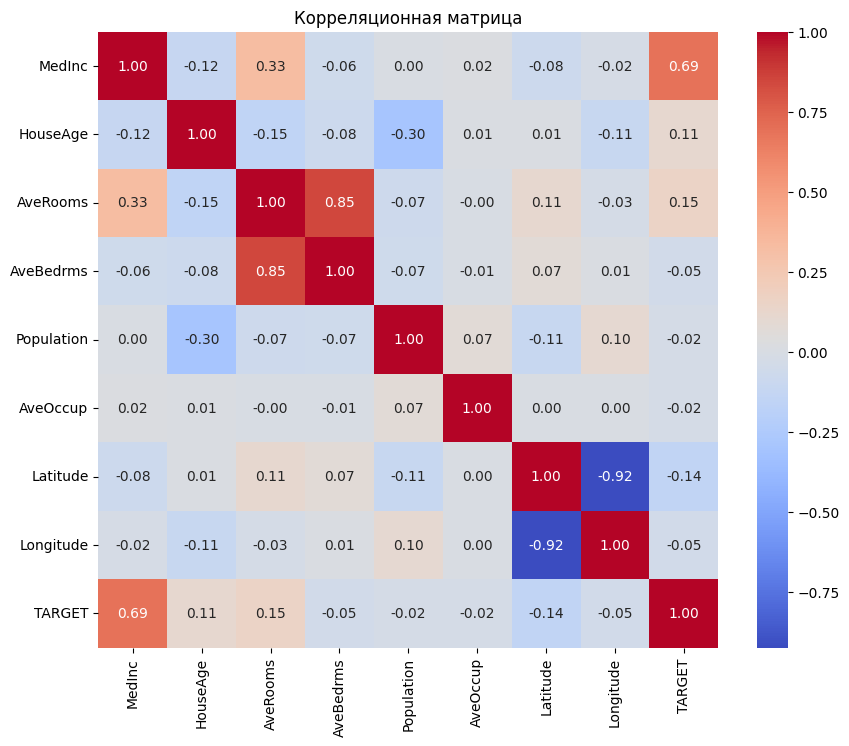

Пара признаков с наибольшей корреляцией: ('AveBedrms', 'AveRooms') (корреляция: 0.85)
Пара признаков с наименьшей корреляцией: ('Longitude', 'Latitude') (корреляция: -0.92)


In [3]:
corr_matrix = california_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
max_corr = upper_triangle.max().max()
min_corr = upper_triangle.min().min()

max_corr_pair = upper_triangle.unstack().sort_values(ascending=False).dropna().idxmax()
min_corr_pair = upper_triangle.unstack().sort_values(ascending=True).dropna().idxmin()

print(f"Пара признаков с наибольшей корреляцией: {max_corr_pair} (корреляция: {max_corr:.2f})")
print(f"Пара признаков с наименьшей корреляцией: {min_corr_pair} (корреляция: {min_corr:.2f})")


Шаг 3: Построение графиков зависимостей. Выбераны два признака с
сильной корреляцией. Заменены на реальные названия признаков из
датасета. Построена диаграмму рассеяния (scatter plot) и добавлена линия
регрессии.

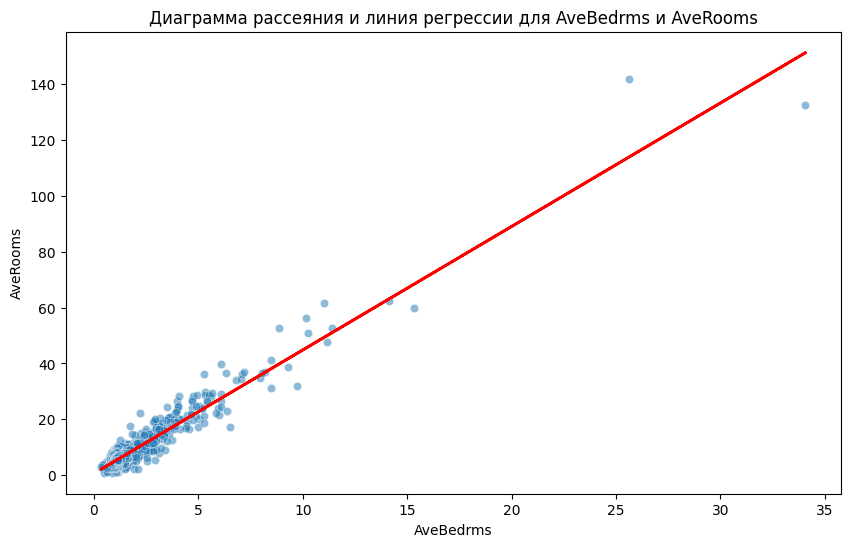

In [4]:
feature1, feature2 = max_corr_pair

plt.figure(figsize=(10, 6))
sns.scatterplot(x=california_df[feature1], y=california_df[feature2], alpha=0.5)

X = california_df[feature1].values.reshape(-1, 1)
y = california_df[feature2].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(california_df[feature1], y_pred, color='red', linewidth=2)
plt.title(f'Диаграмма рассеяния и линия регрессии для {feature1} и {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

Шаг 4: Подготовка данных. Данные были нормализованы, чтобы привести все
признаки к одному масштабу, использовано стандартное масштабирование.
Разделены данные на обучающую и тестовую выборки в пропорции 80/20.

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(california_df.drop('TARGET', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=california.feature_names)
scaled_df['TARGET'] = california_df['TARGET']

print(scaled_df.head())

X = scaled_df.drop('TARGET', axis=1)
y = scaled_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  TARGET  
0  -1.327835   4.526  
1  -1.322844   3.585  
2  -1.332827   3.521  
3  -1.337818   3.413  
4  -1.337818   3.422  
Размер обучающей выборки: (16512, 8)
Размер тестовой выборки: (4128, 8)


Шаг 5: Визуализация трендов. Использована модель линейной регрессии
для предсказания и построен график распределения ошибок между
предсказанными и реальными значениями. Построен график ошибок
(выбросов), чтобы оценить точность модели.

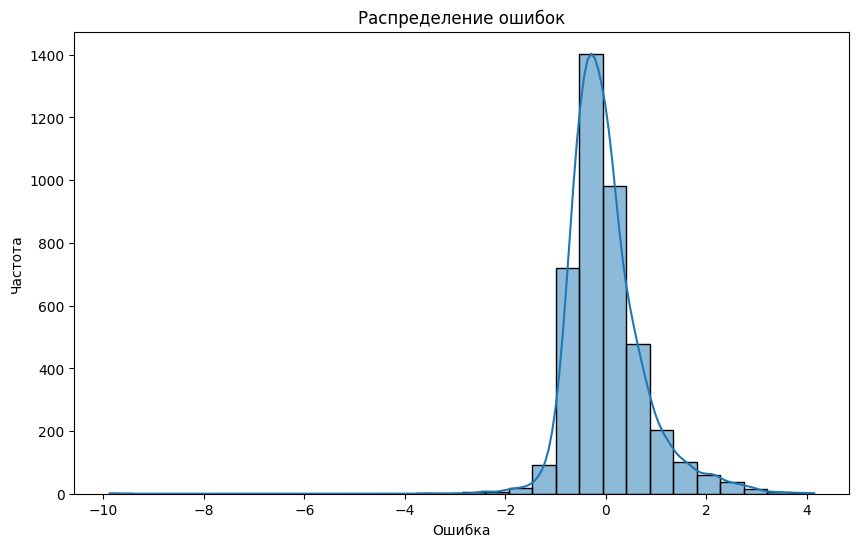

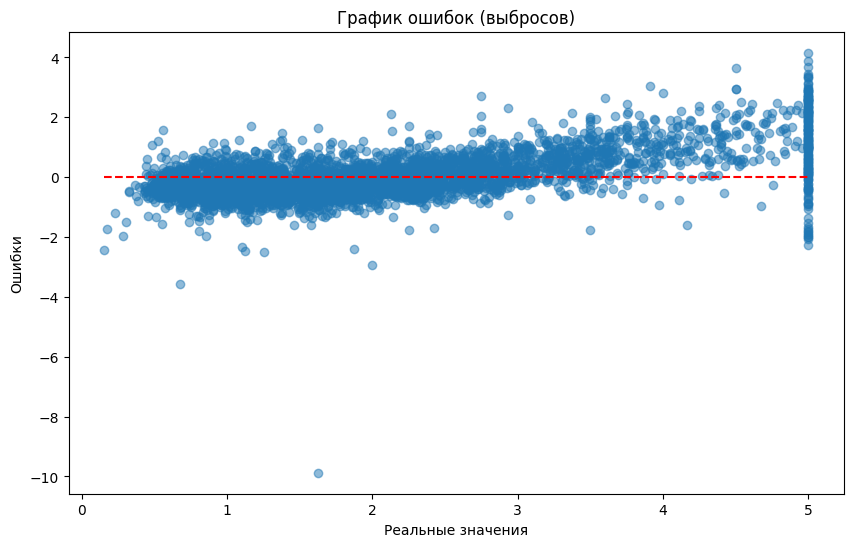

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

errors = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title('Распределение ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='dashed')
plt.title('График ошибок (выбросов)')
plt.xlabel('Реальные значения')
plt.ylabel('Ошибки')
plt.show()

Шаг 6: Как изменение одного признака влияет на
другой? Как влияет масштабирование данных на качество модели?

1. Изменение одного признака может влиять на другой, если между ними есть корреляция. Взаимосвязь может быть линейной или нелинейной, что зависит от модели и данных.

2. Как влияет масштабирование данных на качество модели?
Масштабирование важно для алгоритмов, которые используют расстояния между данными (например, kNN, SVM). Оно улучшает качество таких моделей. Для деревьев решений и некоторых других алгоритмов масштабирование может не быть важным.